<a href="https://colab.research.google.com/github/WilliamAshbee/DeepSlice/blob/master/DeepSlice_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [3]:
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.utils import plot_model


In [4]:
seed = 9
numpy.random.seed(seed)


In [6]:
# load datasets
#csv files were filtered based on the data.
input_file = "input.txt"#you will need to modify this
test_file = "test.txt"#you will need to modify this
dataset = pd.read_csv(input_file).values


In [8]:
dataset.shape

(53168, 9)

In [9]:
# read training data
datasetTest = pd.read_csv(test_file).values


In [10]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8].astype("int32")
Y = dataset[:,8]
XT = datasetTest[:,0:8].astype("int32")

In [11]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)


In [12]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


In [15]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, dummy_y, test_size=0.001, random_state=seed)
# create model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(4,  activation='relu')) #modified
model.add(Dense(3,  activation='tanh')) #modified
model.add(Dense(3,  activation='softmax')) #modified
print(model.summary())
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Fit the model

history = model.fit(X_train, Y_train, validation_split=0.3, epochs=16, batch_size=128)

# evaluate the model
scores = model.evaluate(X_test, Y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/16
291/291 [==============================] - 1s 2ms/step - loss: 1.0751 - accuracy: 0.4777 - val_loss: 0.9399 - val_accuracy: 0.5351
Epoch 2/16
291/291 [==============================] - 0s 1ms/step - loss: 0.7189 - accuracy: 0.6797 - val_loss: 0.5592 - val_accuracy: 0.7188
Epoch 3/16
291/291 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7229 - val_loss: 0.4815 - val_accuracy: 0.7194
Epoch 4/16
291/291 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7230 - val_loss: 0.4502 - val_accuracy: 0.7194
Epoch 5/16
291/291 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7230 - val_loss: 0.4357 - val_accuracy: 0.7194
Epoch 6/16
291/291 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7230 - val_loss: 0.4282 - val_accuracy: 0.7194
Epoch 7/16
291/291 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.7230 - val_loss: 0.4238 - val_accuracy: 0.7194
Epoch 

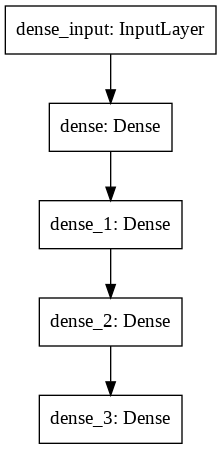

In [17]:
plot_model(model) #removed tofile


In [26]:
[print(key) for key in history.history.keys()]

loss
accuracy
val_loss
val_accuracy


[None, None, None, None]

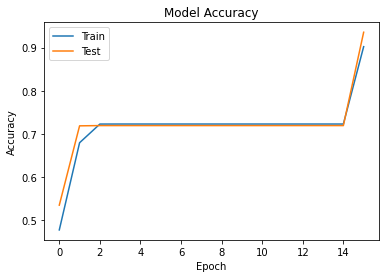

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) #changed key names
plt.plot(history.history['val_accuracy']) #changed key names
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

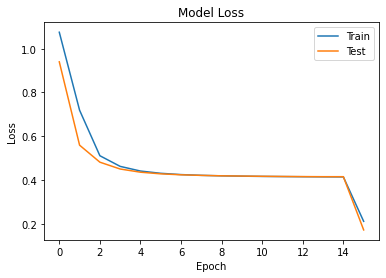

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [29]:
#from sklearn.metrics import confusion_matrix
#y_pred_keras = model.predict_classes(XT)

#csv = open("C:\\DeepSlice\\5G\\output.csv", "w")
#"w" indicates that you're writing strings to the file

#pd.DataFrame(y_pred_keras).to_csv("C:\\DeepSlice\\5G\\output.csv")
#cm = confusion_matrix(Y_test, y_pred_keras, labels=[0, 1, 2])

#csv = open("C:\\DeepSlice\\5G\\input.csv", "w")
#"w" indicates that you're writing strings to the file

#pd.DataFrame(XT).to_csv("C:\\DeepSlice\\5G\\input.csv")